In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
from importlib import reload
%matplotlib inline

import moving_average as ma
import utility

/home/ryohayama/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
data = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2017.csv', sep=';', header=None)
data.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
data = data.set_index('time')
del data['volume']

In [3]:
agg60 = utility.aggregate_periods(data, period=60)

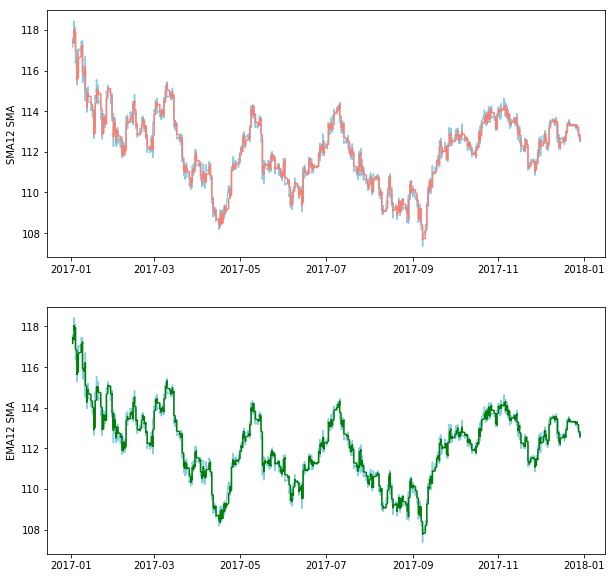

In [4]:
sma1 = ma.SMA(agg60['close'], period=12)
ema1 = ma.EMA(agg60['close'], period=12)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
sma1.plot(ax=ax1)
ema1.plot(ax=ax2, color2='green')

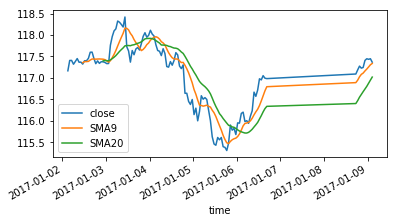

In [5]:
reload(ma)
collection1 = ma.MACollection(agg60.iloc[:120]['close'], type_='simple', periods=[9, 20])
collection1.plot1()

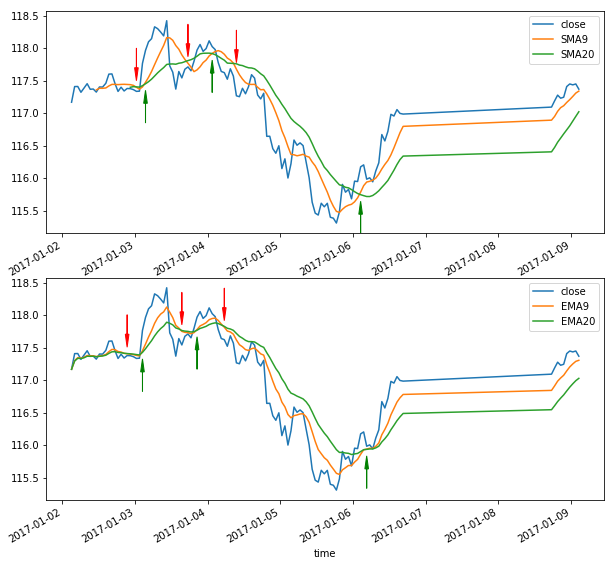

In [6]:
reload(ma)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

collection1 = ma.MACollection(agg60.iloc[:120]['close'], type_='simple', periods=[9, 20])
collection1.plotWithCrosses1(ax=ax1)

collection2 = ma.MACollection(agg60.iloc[:120]['close'], type_='exponential', periods=[9, 20])
collection2.plotWithCrosses1(ax=ax2)

In [7]:
reload(ma)
collection1 = ma.MACollection(agg60.iloc[:120]['close'], type_='simple', periods=[9, 20])
collection1.plot()

Loading BokehJS ...

In [8]:
reload(ma)
collection1 = ma.MACollection(agg60.iloc[:1000]['close'], type_='simple', periods=[9, 20])
collection1.plotWithCrosses()

Loading BokehJS ...

In [9]:
collection1.data

close  numerical_index        SMA9      SMA20  \
time                                                                   
2017-01-02 03:03:00  117.167                0         NaN        NaN   
2017-01-02 04:04:00  117.408                1         NaN        NaN   
2017-01-02 05:06:00  117.409                2         NaN        NaN   
2017-01-02 06:09:00  117.320                3         NaN        NaN   
2017-01-02 07:11:00  117.386                4         NaN        NaN   
2017-01-02 08:12:00  117.452                5         NaN        NaN   
2017-01-02 09:13:00  117.366                6         NaN        NaN   
2017-01-02 10:13:00  117.370                7         NaN        NaN   
2017-01-02 11:13:00  117.323                8  117.355667        NaN   
2017-01-02 12:16:00  117.402                9  117.381778        NaN   
2017-01-02 13:18:00  117.400               10  117.380889        NaN   
2017-01-02 14:22:00  117.458               11  117.386333        NaN   
2017-01-02 15:22:00  117.599               12  117.417333        NaN   
2017-01-02 16:23:00  117.602               13  117.441333        NaN   
2017-01-02 17:24:00  117.453               14  117.441444        NaN   
2017-01-02 18:24:00  117.333               15  117.437778        NaN   
2017-01-02 19:24:00  117.398               16  117.440889        NaN   
2017-01-02 20:24:00  117.340               17  117.442778        NaN   
2017-01-02 21:24:00  117.378               18  117.440111        NaN   
2017-01-02 22:27:00  117.376               19  117.437444  117.39700   
2017-01-02 23:28:00  117.361               20  117.426667  117.40670   
2017-01-03 00:28:00  117.334               21  117.397222  117.40300   
2017-01-03 01:28:00  117.337               22  117.367778  117.39940   
2017-01-03 02:28:00  117.765               23  117.402444  117.42165   
2017-01-03 03:28:00  117.964               24  117.472556  117.45055   
2017-01-03 04:28:00  118.096               25  117.550111  117.48275   
2017-01-03 05:28:00  118.144               26  117.639444  117.52165   
2017-01-03 06:28:00  118.326               27  117.744778  117.56945   
2017-01-03 07:28:00  118.298               28  117.847222  117.61820   
2017-01-03 08:28:00  118.246               29  117.945556  117.66040   
...                      ...              ...         ...        ...   
2017-02-27 14:21:00  112.783              970  112.289889  112.22550   
2017-02-27 15:21:00  112.766              971  112.349111  112.26495   
2017-02-27 16:21:00  112.736              972  112.400000  112.30100   
2017-02-27 17:21:00  112.676              973  112.432333  112.32980   
2017-02-27 18:21:00  112.713              974  112.481778  112.35760   
2017-02-27 19:21:00  112.715              975  112.556111  112.38280   
2017-02-27 20:21:00  112.577              976  112.615000  112.40065   
2017-02-27 21:21:00  112.551              977  112.660222  112.41760   
2017-02-27 22:21:00  112.658              978  112.686111  112.44220   
2017-02-27 23:21:00  112.596              979  112.665333  112.45625   
2017-02-28 00:21:00  112.550              980  112.641333  112.46810   
2017-02-28 01:21:00  112.457              981  112.610333  112.48020   
2017-02-28 02:21:00  112.431              982  112.583111  112.49010   
2017-02-28 03:21:00  112.399              983  112.548222  112.49615   
2017-02-28 04:21:00  112.310              984  112.503222  112.49240   
2017-02-28 05:21:00  112.354              985  112.478444  112.49670   
2017-02-28 06:21:00  112.204              986  112.439889  112.50460   
2017-02-28 07:21:00  112.155              987  112.384000  112.51000   
2017-02-28 08:21:00  112.158              988  112.335333  112.51070   
2017-02-28 09:21:00  112.059              989  112.280778  112.49240   
2017-02-28 10:21:00  111.866              990  112.215111  112.44655   
2017-02-28 11:21:00  112.006              991  112.167889  112.40855   
2017-02-28 12:21:00  111.736              992  112.094222  112.